In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dữ liệu được sử dụng trong bài làm là dữ liệu được WHO thu thập từ tất cả các nước để theo dõi tình hình COVID-19 trên toàn thế giới.
Theo mô tả trên trang web chính thức của WHO:
> 1. WHO-COVID-19-global-data.csv : thống kê số liệu mỗi ngày của các quốc gia.
> 2. WHO-COVID-19-global-table-data.csv: thống kế số liệu thời gian gần đây của các quốc gia.
>
Dữ liệu được thu thập từ ngày 03/01/2020 đến 02/12/2021 của 237 quốc qua trên thế giới.

## 1. Khám phá dữ liệu tình hình COVID-19 các quốc gia

### Đọc dữ liệu từ file

- Đọc dữ liệu từ file `WHO-COVID-19-global-table-data.csv` rồi lưu vào dataframe `global_table_df`.
- Index mặc định là tên quốc gia ,riêng index `Global` đại diện cho toàn cầu.

In [2]:
global_table_df = pd.read_csv('dataset/WHO-COVID-19-global-table-data.csv')
global_table_df.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
Global,NaN,263563622,3381.387611,3973600,50.979273,653682,5232562,67.131117,47864,0.614071,7804,NaN
United States of America,Americas,48413265,14626.247000,605870,183.041000,131187,778336,235.145000,6388,1.930000,1831,NaN
India,South-East Asia,34615757,2508.380000,60326,4.371000,9216,470115,34.066000,2647,0.192000,391,NaN
Brazil,Americas,22105872,10399.855000,62760,29.526000,11413,614964,289.314000,1625,0.764000,283,NaN
The United Kingdom,Europe,10329078,15215.328000,307577,453.079000,53067,145281,214.007000,848,1.249000,141,NaN


### Dữ liệu có bao nhiêu dòng, cột

Tính số dòng và số cột của dataframe `global_table_df` rồi lưu vào `num_rows_global_table` và `num_cols_global_table`

In [3]:
num_rows_global_table , num_cols_global_table = global_table_df.shape
print(f'Dữ liệu có {num_rows_global_table} dòng.')
print(f'Dữ liệu có {num_cols_global_table} cột.')

Dữ liệu có 238 dòng.
Dữ liệu có 12 cột.


Chúng ta không xét tới dòng index `Global` nên dữ liệu gồm 237 `quốc gia`, đúng với mô tả ở trên.

### Mỗi dòng có ý nghĩa gì ? Có vấn đề về ý nghĩa giữa các dòng khác nhau hay không ?

Theo quan sát sơ bộ và file mô tả dữ liệu trên website chính của WHO thì dữ liệu cho biết thông tin về tính hình COVID-19 của từng quốc gia.\
Có vẻ không có vấn đề về ý nghĩa từng dòng.

### Dữ liệu có bị lặp không ?

Tính số dòng dữ liệu bị trùng (nếu có) rồi lưu vào biến `num_rows_dupicated`.

In [4]:
num_rows_duplicated = num_rows_global_table - len(global_table_df.index.drop_duplicates())
print(num_rows_duplicated)

0


### Mỗi cột có ý nghĩa gì ?

Dựa vào mô tả chính thức trên website WHO, em đã mô tả ý nghĩa từng cột dữ liệu trong file `description_global_table.csv`

In [5]:
pd.set_option("display.max_colwidth",200)
description_global_table = pd.read_csv('dataset/Description-global-table.csv',delimiter= '\t',index_col='Field name')

In [6]:
description_global_table

,Type,Description
Field name,,
Name,String,"Country, territory, area"
WHO_region,String,WHO Region
Cases - cumulative total,Integer,Cumulative confirmed cases reported to WHO to date.
Cases - cumulative total per 100000 population,Decimal,"Cumulative confirmed cases reported to WHO to date per 100,000 population."
Cases - newly reported in last 7 days,Integer,New confirmed cases reported in the last 7 days. Calculated by subtracting previous cumulative case count (8 days prior) from current cumulative cases count.
Cases - newly reported in last 7 days per 100000 population,Decimal,"New confirmed cases reported in the last 7 days per 100,000 population."
Cases - newly reported in last 24 hours,Integer,New confirmed cases reported in the last 24 hours. Calculated by subtracting previous cumulative case count from current cumulative cases count.
Deaths - cumulative total,Integer,Cumulative confirmed deaths reported to WHO to date.
Deaths - cumulative total per 100000 population,Decimal,"Cumulative confirmed deaths reported to WHO to date per 100,000 population."


### Mỗi cột hiện tại đang có dữ liệu gì ? Có cột nào có kiểu dữ liệu không phù hợp không ?

In [7]:
global_table_df.dtypes

Name                                                             object
WHO Region                                                        int64
Cases - cumulative total                                        float64
Cases - cumulative total per 100000 population                    int64
Cases - newly reported in last 7 days                           float64
Cases - newly reported in last 7 days per 100000 population       int64
Cases - newly reported in last 24 hours                           int64
Deaths - cumulative total                                       float64
Deaths - cumulative total per 100000 population                   int64
Deaths - newly reported in last 7 days                          float64
Deaths - newly reported in last 7 days per 100000 population      int64
Deaths - newly reported in last 24 hours                        float64
dtype: object

<font color = green  size = 3> Không có gì bất thường </font>

### Phân bố dữ liệu dạng numerical

Dữ liệu ở đây phần lớn ở dạng `numerical`, trừ `Name` và `WHO Region`. \
`WHO Region` kiểu dữ liệu `int64` nhưng đây là mã vùng nên không có nhiều ý nghĩa nếu xếp vào `numerical`

In [8]:
def missing_ration(column):
    return (column.isna().mean() * 100).round(1)

def lower_quantile(column):
    return column.quantile(q= 0.25)

def upper_quantile(column):
    return column.quantile(q= 0.75)

Column `Deaths - newly reported in last 24 hours` chứa nhiều NaN, có thể vì hệ thống chưa cập nhật.\
Để tránh `RuntimeWarning` thì ta sẽ chuyển dữ liệu cột này về 0.

## Tiền xử lý

In [9]:
global_table_df.iloc[:,-1] = global_table_df.iloc[:,-1].fillna(0)

## Quay lại khám phá dữ liệu

In [10]:
numerical_df = global_table_df.drop(columns = ['Name','WHO Region'])
numerical_df.aggregate([missing_ration,pd.Series.min,lower_quantile,
                        pd.Series.median,upper_quantile,pd.Series.max])

,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
missing_ration,0.400,0.00,0.400,0.0,0.00,0.400,0.00,0.400,0.0,0.0
min,0.000,0.00,0.000,0.0,0.00,0.000,0.00,0.000,0.0,0.0
lower_quantile,474.714,50.50,0.777,0.0,122.00,7.112,0.00,0.000,0.0,0.0
median,4757.622,472.00,19.506,32.0,1335.00,52.639,4.50,0.096,0.0,0.0
upper_quantile,9545.916,4943.25,136.391,557.5,9081.25,145.362,70.75,0.901,7.0,0.0
max,25135.735,3973600.00,1413.318,653682.0,5232562.00,610.245,47864.00,12.856,7804.0,0.0


<font color = green  size = 3> Không có gì bất thường </font>

### Phân bố dữ liệu dạng categorical

In [11]:
pd.set_option("display.max_colwidth",100)
global_table_df[['Name','WHO Region']].agg([missing_ration,pd.Series.unique,pd.Series.nunique])

,Name,WHO Region
missing_ration,0.4,0.0
unique,"[nan, Americas, South-East Asia, Europe, Eastern Mediterranean, Africa, Western Pacific, Other]","[263563622, 48413265, 34615757, 22105872, 10329078, 9736037, 8839891, 7538806, 6125596, 6051560,..."
nunique,7,226


<font color = green  size = 3> Không có gì bất thường </font>

Vẽ `barh chart` để xem phân bố các giá trị của cột `Name`

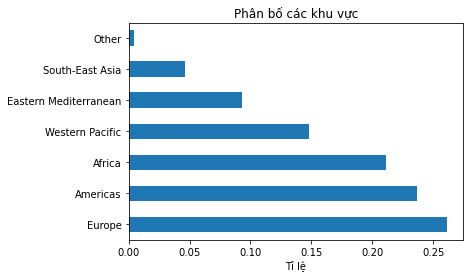

In [12]:
global_table_df['Name'].value_counts(normalize = True).plot.barh()
plt.xlabel('Tỉ lệ')
plt.title('Phân bố các khu vực');

## 2. Khám phá dữ liệu tình hình COVID-19 theo ngày

### Đọc dữ liệu từ file

- Đọc dữ liệu từ file `WHO-COVID-19-global-data.csv` rồi lưu vào dataframe `global_df`.
- Mỗi quốc gia được thống kê trong nhiều ngày, ta nên để index là `số dòng`

In [13]:
global_df = pd.read_csv('dataset/WHO-COVID-19-global-data.csv')
global_df.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
166132,2021-11-29,ZW,Zimbabwe,AFRO,40,133991,0,4705
166133,2021-11-30,ZW,Zimbabwe,AFRO,235,134226,1,4706
166134,2021-12-01,ZW,Zimbabwe,AFRO,426,134652,1,4707
166135,2021-12-02,ZW,Zimbabwe,AFRO,685,135337,0,4707
166136,2021-12-03,ZW,Zimbabwe,AFRO,1042,136379,0,4707


### Dữ liệu có bao nhiêu dòng và cột ?

Tính số dòng và số cột rồi lưu vào biến `num_rows_global` và `num_cols_global`

In [14]:
num_rows_global , num_cols_global = global_df.shape
print(f'Dữ liệu có {num_rows_global} dòng')
print(f'Dữ liệu có {num_cols_global} cột')

Dữ liệu có 166137 dòng
Dữ liệu có 8 cột


### Mỗi dòng dữ liệu có ý nghĩa gì ? Có vấn đề các dòng có ý nghĩa khác nhau không ?

Theo quan sát sơ bộ và file mô tả dữ liệu trên website chính của WHO thì dữ liệu cho biết thông tin về tính hình COVID-19 hằng ngày của từng quốc gia. \
Có vẻ không có vấn đề về ý nghĩa từng dòng.

### Dữ liệu có bị lặp không

Tính số dòng dữ liệu bị trùng (nếu có) rồi lưu vào biến `num_rows_dupicated`.

In [15]:
num_rows_duplicated = num_rows_global - len(global_df.drop_duplicates())
print(num_rows_duplicated)

0


### Mỗi cột có ý nghĩa gì ?

Dựa vào mô tả chính thức trên website WHO, em đã mô tả ý nghĩa từng cột dữ liệu trong file `description_global.csv`

In [16]:
pd.set_option("display.max_colwidth",500)
description_global = pd.read_csv('dataset/Description-global.csv',
                                 delimiter= '\t',index_col= 'Field name')

In [17]:
description_global

,Type,Description
Field name,,
Date_reported,Date,Date of reporting to WHO
Country_code,String,ISO Alpha-2 country code
Country,String,"Country, territory, area"
WHO_region,String,"WHO regional offices: WHO Member States are grouped into six WHO regions -- Regional Office for Africa (AFRO), Regional Office for the Americas (AMRO), Regional Office for South-East Asia (SEARO), Regional Office for Europe (EURO), Regional Office for the Eastern Mediterranean (EMRO), and Regional Office for the Western Pacific (WPRO)."
New_cases,Integer,New confirmed cases. Calculated by subtracting previous cumulative case count from current cumulative cases count.*
Cumulative_cases,Integer,Cumulative confirmed cases reported to WHO to date.
New_deaths,Integer,New confirmed deaths. Calculated by subtracting previous cumulative deaths from current cumulative deaths.*
Cumulative_deaths,Integer,Cumulative confirmed deaths reported to WHO to date.


### Mỗi cột hiện tại đang có dữ liệu gì ?

In [18]:
global_df.dtypes

Date_reported        object
Country_code         object
Country              object
WHO_region           object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object

`Date_reported` nên có kiểu dữ liệu `datetime`

## Tiền xử lý

In [19]:
global_df['Date_reported'] = pd.to_datetime(global_df['Date_reported'])

<font color = green size = 3> Kiểu dữ liệu không có gì bất thường </font>

## Quay lại khám phá dữ liệu

### Phân bố kiểu dữ liệu numerical

In [20]:
numerical_df = global_df.select_dtypes(['int64','float64','datetime64'])
numerical_df.agg([missing_ration,pd.Series.min,lower_quantile,
                  pd.Series.mean,upper_quantile,pd.Series.max])

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
missing_ration,0.0,0.000000,0.000000e+00,0.000000,0.00000
min,2020-01-03 00:00:00,-32952.000000,0.000000e+00,-2371.000000,0.00000
lower_quantile,2020-06-26 00:00:00,0.000000,6.900000e+01,0.000000,0.00000
mean,2020-12-18 00:00:00,1586.423386,4.013239e+05,31.495465,9012.00765
upper_quantile,2021-06-11 00:00:00,402.000000,1.024990e+05,6.000000,1761.00000
max,2021-12-03 00:00:00,414188.000000,4.841326e+07,8786.000000,778336.00000


<font color = green size = 3> Không có gì bất thường </font>

### Phân bố kiểu dữ liệu categorical

In [21]:
pd.set_option("display.max_colwidth",51)
categorical_df = global_df.select_dtypes(['object'])
categorical_df.agg([missing_ration,pd.Series.unique,pd.Series.nunique])

,Country_code,Country,WHO_region
missing_ration,0.4,0.0,0.0
unique,"[AF, AL, DZ, AS, AD, AO, AI, AG, AR, AM, AW, AU...","[Afghanistan, Albania, Algeria, American Samoa,...","[EMRO, EURO, AFRO, WPRO, AMRO, SEARO, Other]"
nunique,236,237,7


Vẽ `barh chart` cho `WHO Region`

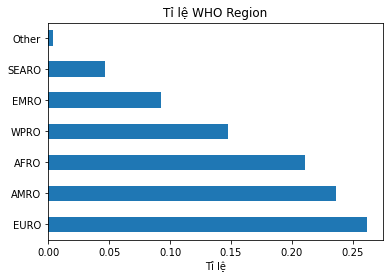

In [22]:
global_df['WHO_region'].value_counts(normalize=True).plot.barh()
plt.xlabel('Tỉ lệ')
plt.title('Tỉ lệ WHO Region');

`Bar chart` này có tỉ lệ khá tương quan với `Bar chart` mà ta đã khám phá ở phần trước đó. 